<a href="https://colab.research.google.com/github/DrewRust/DS-Unit-2-Kaggle-Challenge/blob/master/U2S2M1_Andrew_Rust_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 1*

---

# Decision Trees

## Assignment
- [ ] [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website. You will be given the URL in Slack. Go to the Rules page. Accept the rules of the competition. Notice that the Rules page also has instructions for the Submission process. The Data page has feature definitions.
- [ ] Do train/validate/test split with the Tanzania Waterpumps data.
- [ ] Begin with baselines for classification.
- [ ] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [ ] Get your validation accuracy score.
- [ ] Get and plot your feature importances.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this classification problem, you may want to use the parameter `logistic=True`, but it can be slow.

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```


In [60]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [3]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

profile

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
"""
sample_submission = "sample_submission.csv"
test_features = "test_features.csv"
train_features = "train_features.csv"
train_lables = "train_labels.csv"
"""

In [0]:
"""
sample_submission = pd.read_csv(sample_submission)
test_features = pd.read_csv(test_features)
train_features = pd.read_csv(train_features)
train_labels = pd.read_csv(train_labels.csv)
"""

###Train/validate/test split with the Tanzania Waterpumps data.

In [0]:
# Split train into train & val
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['status_group'], random_state=42)

In [63]:
# ((47520, 41), (11880, 41), (14358, 40))
train.shape, val.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

###Begin with baselines for classification.

In [64]:
train.head(2)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
43360,72938,0.0,2011-07-27,NaN,0,NaN,33.542898,-9.174777,Kwa Mzee Noa,0,Lake Nyasa,Mpandapanda,Mbeya,12,4,Rungwe,Kiwira,0,True,GeoData Consultants Ltd,VWC,K,NaN,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
7263,65358,500.0,2011-03-23,Rc Church,2049,ACRA,34.665760,-9.308548,Kwa Yasinta Ng'Ande,0,Rufiji,Kitichi,Iringa,11,4,Njombe,Imalinyi,175,True,GeoData Consultants Ltd,WUA,Tove Mtwango gravity Scheme,True,2008,gravity,gravity,gravity,wua,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional


In [65]:
target = 'status_group'
y_train = train[target]
y_train.value_counts(normalize=True)

functional                 0.543077
non functional             0.384238
functional needs repair    0.072685
Name: status_group, dtype: float64

In [66]:
# mode gets the most common out of the status_group
majority_class = y_train.mode()[0]
majority_class

'functional'

In [0]:
# Gets percentage
y_train_pred = [majority_class]*len(y_train)

In [68]:
# Should match up with the 0 rate above of 0.54307

from sklearn.metrics import accuracy_score, mean_absolute_error

accuracy_score(y_train, y_train_pred)

0.5430765993265994

In [69]:
# Should be close but slightly different because it's using y_val instead of y_train

y_val = val[target]
y_pred = [majority_class]*len(val)
accuracy_score(y_val, y_pred)

0.5430976430976431

###Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.

###For your Kaggle Challenge, define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.

(For example, what other columns have zeros and shouldn't? What other columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)

In [0]:
import numpy as np

def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    cols_with_zeros = ['longitude', 'latitude']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
            
    # quantity & quantity_group are duplicates, so drop one
    X = X.drop(columns='quantity_group')
    
    # return the wrangled dataframe
    return X


train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)

In [71]:
# look at tain data sample
train.sample(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
42628,18991,0.0,2011-08-09,Tasaf,0,TASAF,33.125649,-2.620488,Kwa Shil,0,Lake Victoria,Budutu,Mwanza,19,7,Missungwi,Kanyelele,0,NaN,GeoData Consultants Ltd,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,unknown,unknown,unknown,machine dbh,borehole,groundwater,hand pump,hand pump,functional
20755,21647,0.0,2013-03-20,0,16,0,39.413299,-7.017496,Kwa Njasi,0,Wami / Ruvu,Mkamba,Dar es Salaam,7,3,Temeke,Kisarawe II,100,True,GeoData Consultants Ltd,SWC,NaN,False,2000,nira/tanira,nira/tanira,handpump,other - school,other,never pay,never pay,soft,good,enough,shallow well,shallow well,groundwater,other,other,non functional
1028,26402,0.0,2013-01-16,Rwssp,0,DWE,32.511435,-3.244474,Kwa Lusambaja Lundala,0,Lake Tanganyika,Majengo,Shinyanga,17,3,Kahama,Bugarama,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,seasonal,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
7410,3922,50.0,2013-03-23,0,28,0,39.173048,-6.896921,Amlike,0,Wami / Ruvu,Mtaa Wa Kipunguni B,Dar es Salaam,7,2,Ilala,Kitunda,80,NaN,GeoData Consultants Ltd,Private operator,NaN,False,2010,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional
48402,33699,0.0,2011-07-20,Plan Internatio,0,DWE,32.919325,-2.635532,Kwa Nyangwi,0,Lake Victoria,Bulale,Mwanza,19,3,Ilemela,Buhongwa,0,True,GeoData Consultants Ltd,VWC,Bulale Water Supply,True,0,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional


In [0]:
# turn into a dateTime dtype
train['date_recorded'] = pd.to_datetime(train.date_recorded)
val['date_recorded'] = pd.to_datetime(val.date_recorded)
test['date_recorded'] = pd.to_datetime(test.date_recorded)

In [0]:
# creating new column date_recorded_year
train['date_recorded_year'] = pd.DatetimeIndex(train['date_recorded']).year
val['date_recorded_year'] = pd.DatetimeIndex(val['date_recorded']).year
test['date_recorded_year'] = pd.DatetimeIndex(test['date_recorded']).year

In [74]:
train['construction_year'].dtype

dtype('int64')

In [75]:
train['date_recorded_year'].dtype

dtype('int64')

In [76]:
train.head(3)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,date_recorded_year
43360,72938,0.0,2011-07-27,NaN,0,NaN,33.542898,-9.174777,Kwa Mzee Noa,0,Lake Nyasa,Mpandapanda,Mbeya,12,4,Rungwe,Kiwira,0,True,GeoData Consultants Ltd,VWC,K,NaN,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2011
7263,65358,500.0,2011-03-23,Rc Church,2049,ACRA,34.665760,-9.308548,Kwa Yasinta Ng'Ande,0,Rufiji,Kitichi,Iringa,11,4,Njombe,Imalinyi,175,True,GeoData Consultants Ltd,WUA,Tove Mtwango gravity Scheme,True,2008,gravity,gravity,gravity,wua,user-group,pay monthly,monthly,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2011
2486,469,25.0,2011-03-07,Donor,290,Do,38.238568,-6.179919,Kwasungwini,0,Wami / Ruvu,Kwedigongo,Pwani,6,1,Bagamoyo,Mbwewe,2300,True,GeoData Consultants Ltd,VWC,NaN,False,2010,india mark ii,india mark ii,handpump,vwc,user-group,pay per bucket,per bucket,salty,salty,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional,2011


In [77]:
# lot of zeros!
train['construction_year'].value_counts()[:10]

0       16517
2010     2136
2008     2102
2009     2036
2000     1650
2007     1282
2006     1179
2003     1037
2011     1008
2004      909
Name: construction_year, dtype: int64

In [0]:
# resets index makes it nicer looking
train = train.reset_index(drop=True)

In [0]:
val = val.reset_index(drop=True)

In [0]:
test = test.reset_index(drop=True)

In [0]:
# subtracting years since construction to inspection
train['yrs_since_insp'] = train.apply(lambda row: (row.date_recorded_year) - (row.construction_year), axis = 1) 

In [0]:
val['yrs_since_insp'] = val.apply(lambda row: (row.date_recorded_year) - (row.construction_year), axis = 1) 

In [0]:
test['yrs_since_insp'] = test.apply(lambda row: (row.date_recorded_year) - (row.construction_year), axis = 1) 

In [0]:
# doing this to all df's because some of the values were 0 and subtracted nothing and are useless
train.loc[train['yrs_since_insp'] > 100, 'yrs_since_insp'] = np.nan

In [0]:
val.loc[val['yrs_since_insp'] > 100, 'yrs_since_insp'] = np.nan

In [0]:
test.loc[test['yrs_since_insp'] > 100, 'yrs_since_insp'] = np.nan

### Now there's a new column of years from creation to inspection.

###Getting rid of more zero values.

In [0]:
def wrangle2(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    cols_with_zeros = ['amount_tsh', 'gps_height', 'num_private', 'population', 'construction_year']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
    
    # return the wrangled dataframe
    return X


train = wrangle2(train)
val = wrangle2(val)
test = wrangle2(test)

In [88]:
# impute missing values later
train['public_meeting'].isnull().sum()

2644

In [89]:
train['permit'].isnull().sum()

2443

In [90]:
# The status_group column is the target
target = 'status_group'

# Get a dataframe with all train columns except the target & id
train_features = train.drop(columns=[target, 'id'])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 50].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features
print(features)

['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year', 'date_recorded_year', 'yrs_since_insp', 'basin', 'region', 'public_meeting', 'recorded_by', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']


In [0]:
# Arrange data into X features matrix and y target vector  
# Don't have target for X_test 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

###Get your validation accuracy score.

In [92]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

encoder = ce.OneHotEncoder(use_cat_names=True)
imputer = SimpleImputer()
scaler = StandardScaler()
model = LogisticRegression(multi_class='auto', solver='lbfgs', n_jobs=-1)

X_train_encoded = encoder.fit_transform(X_train)
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_train_scaled = scaler.fit_transform(X_train_imputed)
model.fit(X_train_scaled, y_train)

X_val_encoded = encoder.transform(X_val)
X_val_imputed = imputer.transform(X_val_encoded)
X_val_scaled = scaler.transform(X_val_imputed)
print('Validation Accuracy', model.score(X_val_scaled, y_val))

X_test_encoded = encoder.transform(X_test)
X_test_imputed = imputer.transform(X_test_encoded)
X_test_scaled = scaler.transform(X_test_imputed)
y_pred = model.predict(X_test_scaled)

Validation Accuracy 0.7357744107744107


In [93]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    LogisticRegression(multi_class='auto', solver='lbfgs', n_jobs=-1)
)

pipeline.fit(X_train, y_train)
print(f'Train accuracy: {pipeline.score(X_train, y_train)}')
print(f'Validation accuracy: {pipeline.score(X_val, y_val)}')

Train accuracy: 0.7398148148148148
Validation accuracy: 0.7357744107744107


###Get and plot your feature importances.

In [46]:
pipeline.named_steps['onehotencoder']

OneHotEncoder(cols=['basin', 'region', 'public_meeting', 'recorded_by',
                    'scheme_management', 'permit', 'extraction_type',
                    'extraction_type_group', 'extraction_type_class',
                    'management', 'management_group', 'payment', 'payment_type',
                    'water_quality', 'quality_group', 'quantity', 'source',
                    'source_type', 'source_class', 'waterpoint_type',
                    'waterpoint_type_group'],
              drop_invariant=False, handle_missing='value',
              handle_unknown='value', return_df=True, use_cat_names=True,
              verbose=0)

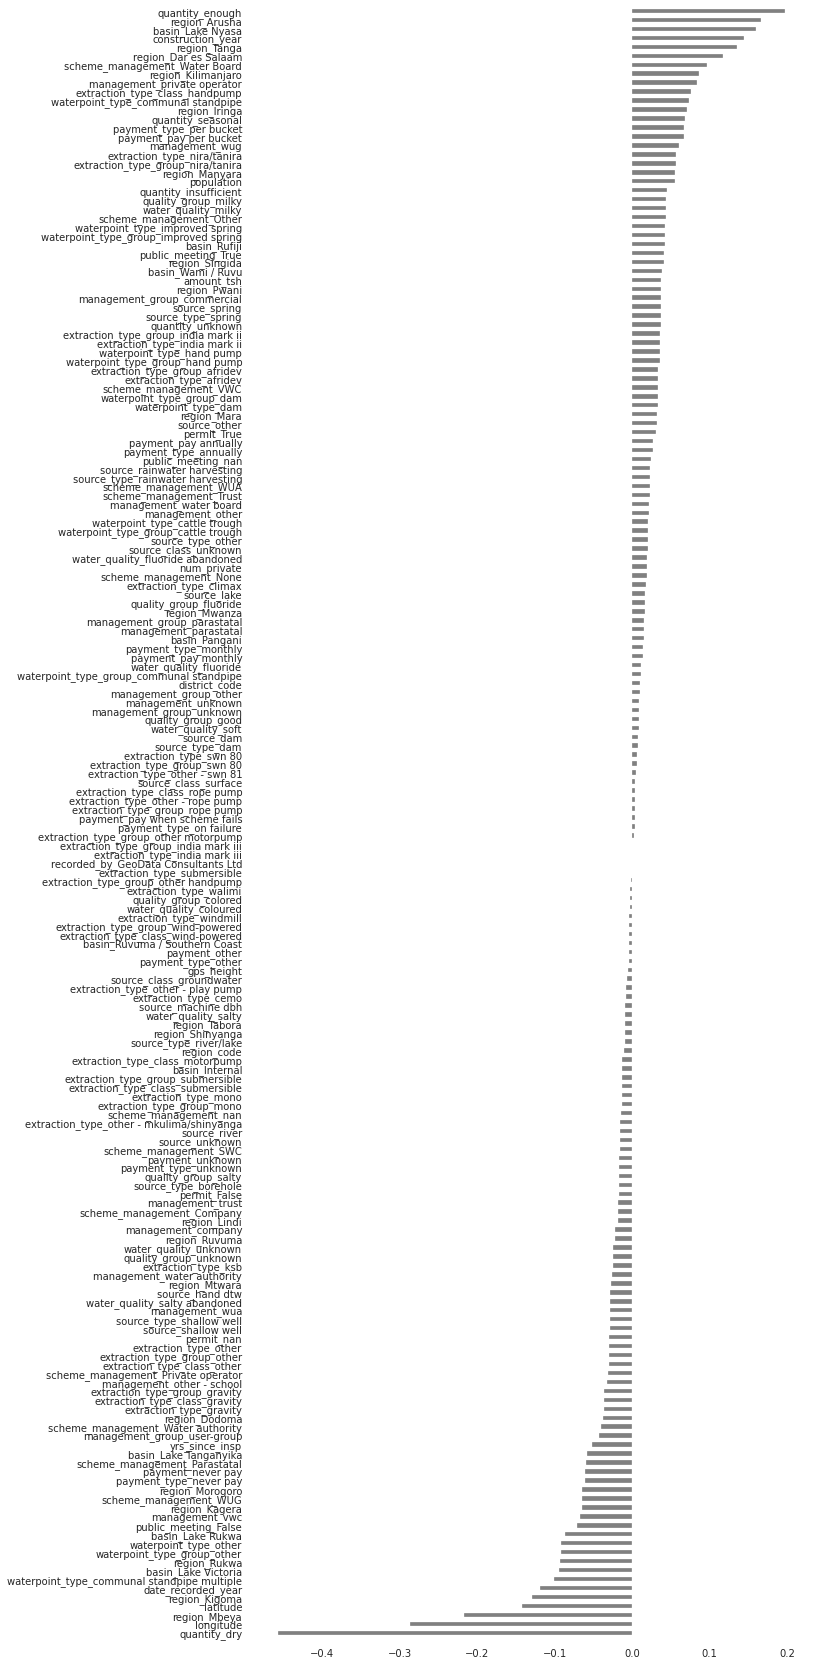

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

model = pipeline.named_steps['logisticregression']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns
coefficients = pd.Series(model.coef_[0], encoded_columns)
plt.figure(figsize=(10,30))
coefficients.sort_values().plot.barh(color='grey');

The most important features are the ones that show the biggest horizontal bar chart size on the plot.

### Sample Submission

In [49]:
# just checking on the sample submission size so I can understand it better.
print(sample_submission.shape)
sample_submission.head()

(14358, 2)


,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,functional
4,49871,functional


In [51]:
# y_pred = model.predict(X_test_scaled)
# the above y_pred is done farther up above earlier and I believe this is how it's done correctly 
# looking off U2S1M4 notes
print(y_pred.shape)
y_pred

(14358,)


array(['non functional', 'functional', 'non functional', ...,
       'functional', 'functional', 'non functional'], dtype=object)

In [53]:
print(test.shape)
test.head(2)

(14358, 41)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,date_recorded_year,yrs_since_insp
0,50785,NaN,2013-02-04,Dmdd,1996.0,DMDD,35.290799,-4.059696,Dinamu Secondary School,NaN,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321.0,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012.0,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,2013,1.0
1,51630,NaN,2013-02-04,Government Of Tanzania,1569.0,DWE,36.656709,-3.309214,Kimnyak,NaN,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300.0,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000.0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,2013,13.0


In [54]:
submission = test[['id']].copy()
submission

,id
0,50785
1,51630
2,17168
3,45559
4,49871
...,...
14353,39307
14354,18990
14355,28749
14356,33492


In [0]:
submission['status_group'] = y_pred

In [57]:
# This is my submission
print(submission.shape)
submission.head(5)

(14358, 2)


,id,status_group
0,50785,non functional
1,51630,functional
2,17168,non functional
3,45559,non functional
4,49871,functional


In [0]:
submission.to_csv('my_submission.csv', index=False)

###Decision Tree Classifier

In [94]:
from sklearn.tree import DecisionTreeClassifier

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    DecisionTreeClassifier(random_state=42)
)

pipeline.fit(X_train, y_train)
print(f'Train accuracy: {pipeline.score(X_train, y_train)}')
print(f'Validation accuracy: {pipeline.score(X_val, y_val)}')

Train accuracy: 0.9959595959595959
Validation accuracy: 0.7618686868686869
